!pip install keras==2.3.1 
!pip install tensorflow==2.4.0

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import cv2
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
# Stop words
from nltk.corpus import stopwords
# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim
import os
import transformers
from transformers import TFAutoModel
from transformers import AutoTokenizer
import tensorflow_hub as hub
import math as m
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd /content/gdrive/MyDrive/openclassroom/

/content/gdrive/MyDrive/openclassroom


In [5]:
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [6]:
df = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [7]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [8]:
df.shape

(1050, 15)

In [9]:
df.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [10]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [11]:
df_drop = df.copy()

In [12]:
#Je remplace les NaN par le mot rien
df_drop['product_specifications'] = df_drop['product_specifications'].replace([np.nan], 'Rien')

In [13]:
#Je remplace les NaN par le mot Autre
df_drop['brand'] = df_drop['brand'].replace([np.nan], 'Autre')

In [14]:
#Je remplace les NaN par la moyenne
df_drop['retail_price'] = df_drop['retail_price'].fillna(df_drop['retail_price'].mean())
df_drop['discounted_price'] = df_drop['discounted_price'].fillna(df_drop['discounted_price'].mean())

In [15]:
df_drop.isna().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [16]:
df_drop.shape

(1050, 15)

In [17]:
# Tokenizer
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens


stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw



def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


In [18]:
df_drop['sentence_bow'] = df_drop['description'].apply(lambda x : transform_bow_fct(x))
df_drop['sentence_bow_lem'] = df_drop['description'].apply(lambda x : transform_bow_lem_fct(x))
df_drop['sentence_dl'] = df_drop['description'].apply(lambda x : transform_dl_fct(x))

In [19]:
df_drop

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.000000,999.000000,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http

In [20]:
df_drop2 = df_drop.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'pid', 'product_rating', 'overall_rating'], axis = 1)

In [21]:
l_cat = list(set(df_drop2['product_category_tree']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_drop2.iloc[i]['product_category_tree'])) for i in range(len(df_drop2))]

catégories :  ['["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Shrikant Traders Baby Bath Towels"]', '["Home Furnishing >> Kitchen & Dining Linen >> Kitchen Linen Sets >> Cotonex Yellow, Green Cotton Kitchen Linen Set (..."]', '["Baby Care >> Feeding & Nursing >> Utensils >> Sippers & Cups >> Munchkin Sippers & Cups"]', '["Home Decor & Festive Needs >> Wall Decor & Clocks >> Clocks >> Wall Clocks >> eCraftIndia Wall Clocks"]', '["Home Furnishing >> Kitchen & Dining Linen >> Table Covers >> Prime Printed 8 Seater Table Cover (Multicolor, ..."]', '["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]', '["Computers >> Computer Peripherals >> Printers & Inks >> Toners >> Filink Toners"]', '["Home Decor & Festive Needs >> Table Decor & Handicrafts >> Showpieces >> Religious Idols >> Agrasen International Religious Idols"]', '["Computers >> Laptop Accessories >> USB Gadgets >> De TechInn USB Gadgets"]', '["Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Arabian N

In [22]:
df_drop2

,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1399.000000,999.000000,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4930.000000,1896.000000,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker ( pack ...
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4500.000000,1449.000000,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3465.000000,1333.000000,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",bu

In [23]:
df_drop2['product_category_tree'].value_counts()

["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                         56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                           26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                  23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                         22
["Home Furnishing >> Bath Linen >> Towels"]                                           19
                                                                                      ..
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Infinity India Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Ravishing Variety Ethnic"]     1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Pg handicrafts Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]           1
["Watches >> Wrist Watches >> Petrol Wrist Watches"]                                   1
Name: product_categor

In [24]:
for i in df_drop2:
    print(i)
    print(df_drop2[i].nunique())

product_name
1050
product_category_tree
642
retail_price
355
discounted_price
425
image
1050
is_FK_Advantage_product
2
description
1050
brand
491
product_specifications
985
sentence_bow
1048
sentence_bow_lem
1048
sentence_dl
1050


In [25]:
df_drop2

,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1399.000000,999.000000,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4930.000000,1896.000000,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker ( pack ...
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4500.000000,1449.000000,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3465.000000,1333.000000,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",bu

In [26]:
df_drop2['categorie1'] = df_drop2['product_category_tree'].str.split().str[0]
df_drop2['categorie2'] = df_drop2['product_category_tree'].str.split().str[1]

In [27]:
df_drop2['categorie'] = df_drop2['categorie1'] + ' ' + df_drop2['categorie2']
df_drop2 = df_drop2.drop(['categorie1', 'categorie2'], axis = 1)

In [28]:
df_drop2

,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl,categorie
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,"[""Home Furnishing"
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,"[""Baby Care"
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,"[""Baby Care"
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,"[""Home Furnishing"
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,"[""Home Furnishing"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1399.000000,999.000000,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,"[""Baby Care"
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4930.000000,1896.000000,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker ( pack ...,"[""Baby Care"
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4500.000000,1449.000000,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,"[""Baby Care"
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3465.000000,1333.000000,c3edc504d1b

In [29]:
MyList = df_drop2['categorie']
Malist = []

In [30]:
for i in MyList :
    setence = i.replace('[', '').replace('"', '').replace('>', '').replace('Beauty and','Beauty and Personal Care').replace('Kitchen &','Kitchen & Dining').replace('Home Decor','Home Decor & Festive Needs')
    Malist.append(setence)

In [31]:
df_drop2['categorie'] = Malist

In [32]:
df_drop2['categorie'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: categorie, dtype: int64

In [33]:
l_cat = list(set(df_drop2['categorie']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df_drop2.iloc[i]['categorie'])) for i in range(len(df_drop2))]

catégories :  ['Baby Care', 'Beauty and Personal Care', 'Watches ', 'Kitchen & Dining', 'Computers ', 'Home Furnishing', 'Home Decor & Festive Needs']


In [34]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [35]:
df_drop2

,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl,categorie
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,Home Furnishing
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,Baby Care
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1399.000000,999.000000,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4930.000000,1896.000000,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker ( pack ...,Baby Care
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4500.000000,1449.000000,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,Baby Care
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3465.000000,1333.000000,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wall

# BAG OF WORD TF-IDF

In [36]:
# création du bag of words (CountVectorizer et Tf-idf)
cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(df_drop2[feat])
ctf_fit = ctf.fit(df_drop2[feat])

cv_transform = cvect.transform(df_drop2[feat])  
ctf_transform = ctf.transform(df_drop2[feat])  

In [37]:
cv_transform.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [38]:
cv_fit.vocabulary_

{'key': 2923,
 'feature': 2236,
 'elegance': 2046,
 'polyester': 3825,
 'multicolor': 3376,
 'abstract': 754,
 'eyelet': 2185,
 'door': 1933,
 'curtain': 1735,
 'floral': 2316,
 '213': 234,
 'height': 2619,
 'pack': 3619,
 'price': 3898,
 '899': 692,
 'enhances': 2080,
 'look': 3098,
 'interiors': 2816,
 '100': 32,
 'high': 2635,
 'quality': 3989,
 'fabric': 2190,
 'style': 4718,
 'stitch': 4670,
 'metal': 3270,
 'ring': 4195,
 'make': 3171,
 'room': 4227,
 'environment': 2101,
 'romantic': 4224,
 'loving': 3121,
 'ant': 896,
 'wrinkle': 5283,
 'anti': 900,
 'shrinkage': 4450,
 'elegant': 2047,
 'apparance': 914,
 'home': 2661,
 'bright': 1240,
 'modernistic': 3320,
 'appeal': 916,
 'design': 1835,
 'surreal': 4782,
 'attention': 988,
 'sure': 4773,
 'steal': 4653,
 'heart': 2613,
 'contemporary': 1611,
 'valance': 5072,
 'slide': 4508,
 'smoothly': 4534,
 'draw': 1944,
 'apart': 909,
 'thing': 4885,
 'morning': 3342,
 'welcome': 5209,
 'sun': 4746,
 'ray': 4046,
 'want': 5172,
 'wish'

In [39]:
cv_transform

<1050x5324 sparse matrix of type '<class 'numpy.int64'>'
	with 34179 stored elements in Compressed Sparse Row format>

In [40]:
time1 = time.time()
num_labels=len(l_cat)
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(cv_transform)

In [41]:
len(X_tsne)

1050

CountVectorizer : 
-----------------
ARI :  0.3842 time :  13.0


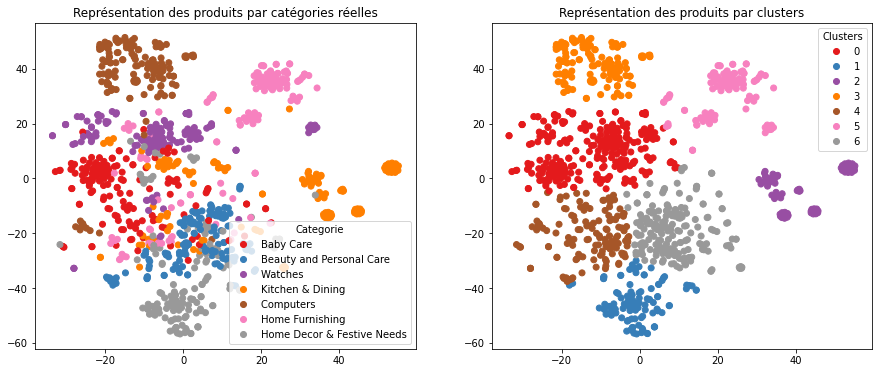

ARI :  0.3842


In [42]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)


In [43]:
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)



Tf-idf : 
--------
ARI :  0.4965 time :  12.0


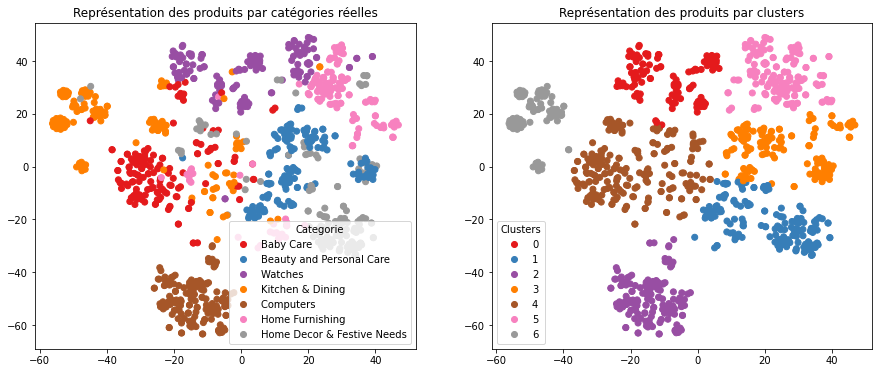

ARI :  0.4965


In [44]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# WORD2VEC

In [45]:
w2v_size = 300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df_drop2['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [46]:
#!pip install gensim==4.0
import gensim

In [47]:
gensim.__version__

'4.0.0'

In [49]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window, vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [50]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


In [51]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


In [52]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1413900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


In [53]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [54]:
embeddings

array([[-0.8175407 , -0.7237034 , -0.72651774, ...,  0.8333158 ,
         0.9075175 ,  0.6673401 ],
       [-1.0720061 , -0.979676  , -0.52118677, ...,  0.7488608 ,
         0.52499205,  0.5025211 ],
       [-0.79421276, -0.953535  , -0.75344807, ...,  0.7102342 ,
         0.44895232,  0.6915643 ],
       ...,
       [-0.41186437,  0.7174144 , -0.66683084, ..., -0.7324007 ,
         0.15835898,  0.06532045],
       [-0.66839236,  0.92361814, -0.76419073, ..., -1.1174942 ,
         0.35152116,  0.14844911],
       [-0.41062555,  0.82845324, -0.6961417 , ..., -0.78577757,
         0.27694196,  0.00992126]], dtype=float32)

In [55]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.2798 time :  11.0


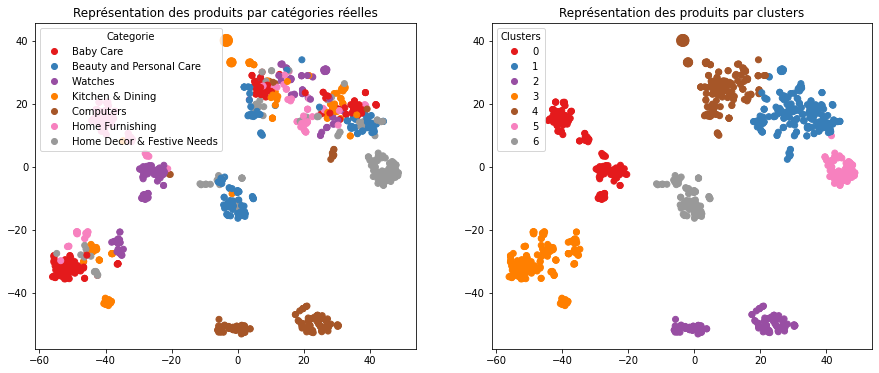

ARI :  0.2798


In [56]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [57]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [58]:
#!pip install transformers
import transformers
from transformers import TFAutoModel

In [59]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_drop2['sentence_dl'].to_list()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [60]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

1/1 [==============================] - 0s 26ms/step
temps traitement :  19.0


In [61]:
features_bert

array([[ 0.02136624, -0.12710698,  0.7144562 , ..., -0.19649377,
        -0.04728605, -0.16656628],
       [ 0.2728252 , -0.07227652,  0.56295776, ..., -0.3023732 ,
        -0.34650603,  0.05181235],
       [ 0.07393982, -0.12485927,  0.58087486, ..., -0.23786229,
        -0.19598609, -0.10346239],
       ...,
       [ 0.27225313, -0.13122764,  0.4963737 , ..., -0.00375611,
         0.08455549, -0.07019981],
       [ 0.24114804, -0.08183015,  0.5227964 , ...,  0.01283087,
         0.04979952, -0.22071964],
       [ 0.2509205 , -0.15272018,  0.6291262 , ...,  0.01634395,
         0.01653761, -0.17665794]], dtype=float32)

In [62]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.325 time :  14.0


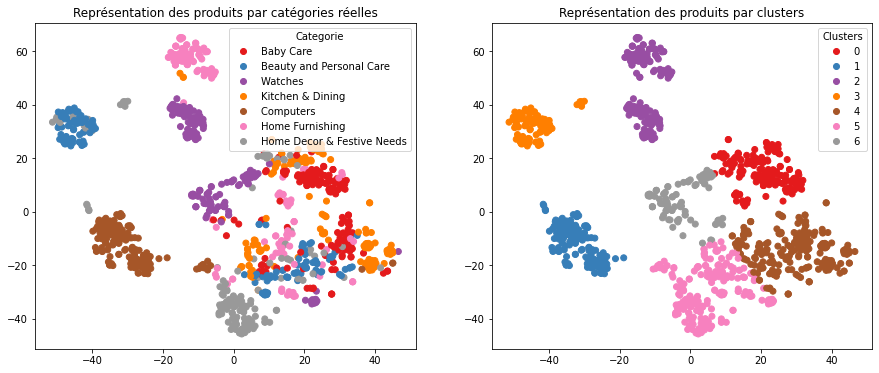

ARI :  0.325


In [63]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# UNIVERSAL SENTENCE ENCODER

In [64]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [65]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [66]:
batch_size = 10
sentences = df_drop2['sentence_dl'].to_list()

In [67]:
features_USE = feature_USE_fct(sentences, batch_size)

In [68]:
features_USE

array([[-0.05539607, -0.02782313,  0.01833175, ...,  0.05086441,
         0.04917976, -0.01530944],
       [-0.0512289 , -0.01898723,  0.0122769 , ...,  0.03308193,
         0.03153948,  0.0346358 ],
       [-0.05810828,  0.02152606, -0.04410996, ...,  0.05775318,
        -0.05077325, -0.04726296],
       ...,
       [-0.0440805 , -0.03755886,  0.03047281, ...,  0.01414979,
         0.0576544 , -0.06278041],
       [-0.04686179, -0.03928439,  0.04898709, ...,  0.04509435,
        -0.01900148, -0.02946294],
       [-0.05539847, -0.02439285,  0.05092695, ...,  0.04759793,
        -0.02505925, -0.01377853]], dtype=float32)

In [69]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4381 time :  12.0


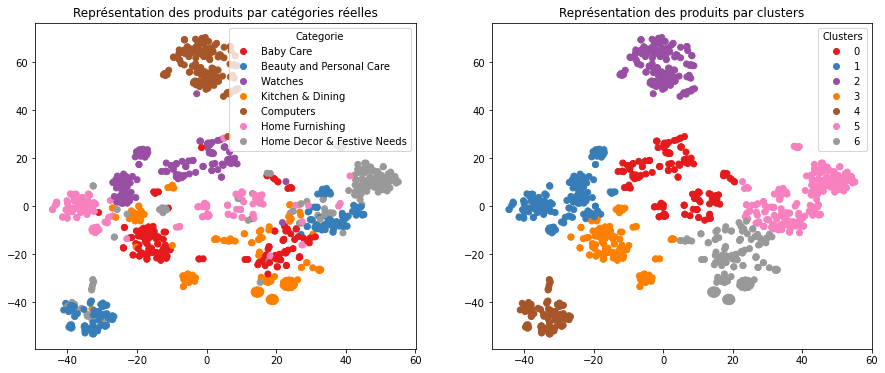

ARI :  0.4381


In [70]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [71]:
df_drop2['vrai_cat'] = y_cat_num
df_drop2['labels'] = labels

In [72]:
df_drop2['labels'] = df_drop2['labels'].astype(str)

In [73]:
df_drop2

,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl,categorie,vrai_cat,labels
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,Home Furnishing,-4,5
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,Baby Care,1,5
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,Baby Care,1,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,Home Furnishing,-4,5
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,Home Furnishing,-4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1399.000000,999.000000,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,Baby Care,1,0
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4930.000000,1896.000000,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker ( pack ...,Baby Care,1,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4500.000000,1449.000000,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,Baby Care,1,3
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3465.000000,1333

In [74]:
conditionlist = [
    (df_drop2['labels'].str.contains("0")== True) ,
    (df_drop2['labels'].str.contains("1")== True),
    (df_drop2['labels'].str.contains("2")== True),
    (df_drop2['labels'].str.contains("3")== True),
    (df_drop2['labels'].str.contains("4")== True),
    (df_drop2['labels'].str.contains("5")== True),
    (df_drop2['labels'].str.contains("6")== True)]
choicelist = ['Computers ', 'Watches ', 'Beauty and Personal Care','Home Furnishing','Baby Care','Home Furnishing','Home Decor & Festive Needs']
df_drop2['cat_labels'] = np.select(conditionlist, choicelist, default='Not Specified')

In [75]:
df_drop2

,product_name,product_category_tree,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl,categorie,vrai_cat,labels,cat_labels
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,Home Furnishing,-4,5,Home Furnishing
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,Baby Care,1,5,Home Furnishing
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,Baby Care,1,5,Home Furnishing
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,Home Furnishing,-4,5,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,Home Furnishing,-4,5,Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",1399.000000,999.000000,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,Baby Care,1,0,Computers
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4930.000000,1896.000000,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker ( pack ...,Baby Care,1,0,Computers
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",4500.000000,1449.000000,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,buy uberlyfe extra large pigmented polyvinyl f...,Baby Care,1,3

In [76]:
df_compare = df_drop2[df_drop2['categorie'] != df_drop2['cat_labels']]

In [77]:
df_compare[['product_name', 'categorie', 'cat_labels', 'image']]

,product_name,categorie,cat_labels,image
1,Sathiyas Cotton Bath Towel,Baby Care,Home Furnishing,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Eurospa Cotton Terry Face Towel Set,Baby Care,Home Furnishing,64d5d4a258243731dc7bbb1eef49ad74.jpg
5,Maserati Time R8851116001 Analog Watch - For ...,Watches,Beauty and Personal Care,893aa5ed55f7cff2eccea7758d7a86bd.jpg
6,"Camerii WM64 Elegance Analog Watch - For Men,...",Watches,Beauty and Personal Care,f355cc1ccb08bd0d283ed979b7ee7515.jpg
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,Watches,Beauty and Personal Care,dd0e3470a7e6ed76fd69c2da27721041.jpg
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Baby Care,Computers,958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,Wallmantra Large Vinyl Sticker Sticker,Baby Care,Computers,fd6cbcc22efb6b761bd564c28928483c.jpg
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby Care,Home Furnishing,5912e037d12774bb73a2048f35a00009.jpg
1048,Wallmantra Medium Vinyl Sticker Sticker,Baby Care,Home Furnishing,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


# ORB Rajout

In [78]:
allFeatures=[]

for filename in os.listdir('./Images/'):
    img = cv2.imread('./Images/'+filename)
    img1 = cv2.resize(img, (240,240), interpolation = cv2.INTER_AREA)
    mask = np.zeros(img1.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (5,5,235,235)
    cv2.grabCut(img1,mask,rect,bgdModel,fgdModel,10,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img1 = img1*mask2[:,:,np.newaxis]
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    #img1= cv2.GaussianBlur(img1,(5,5),cv2.BORDER_DEFAULT)
    ll=cv2.equalizeHist(img1)
    orb = cv2.ORB_create(nfeatures=200)
    keypoints, descriptors = orb.detectAndCompute(ll, None)
    allFeatures.append(descriptors)#array[ImageNb][FeatureNb]

In [79]:
kmeans = KMeans(n_clusters = 7, n_init=10, init='random')

In [80]:
gg=[]
for sublist in allFeatures:
    if sublist is None:
        sublist = a
    a = sublist
    for item in sublist:
        gg.append(item)

In [81]:
kmeans.fit(gg)#vocabulary

KMeans(init='random', n_clusters=7)

In [82]:
documentsPerFeature=[0] * 200

alla=[]
p = 0
for i in allFeatures:
    clusters=[]
    if i is None:
        i = a    
    a = i
    for u in i:
        clust=kmeans.predict([u])  
        clusters.append(clust[0])
        
    nums=pd.Series(clusters).value_counts()
    tf=nums.apply(lambda a:a/nums.sum())
    alla.append(tf.to_dict())
    p = p + 1
    if p == 500 or p == 1000 or p == 100:
        print(p)
#tf for each feature in the document



100
500
1000


In [83]:
for i in alla:
    for k in i:
        documentsPerFeature[k-1]=documentsPerFeature[k-1]+1
#number of documents containing a given feature

In [84]:
fr = pd.DataFrame()

In [85]:
for i in alla:
    row=[0]*200
    totalWords=0
    for k in i:
        idf=m.log(len(alla)/documentsPerFeature[k-1])
        res=i[k]*idf
        row[k]=res
    fr=fr.append(pd.Series(row, range(1,201)),ignore_index=True )  
fr

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.001349,0.001552,0.000700,0.000387,0.001410,0.000795,0.000800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001693,0.001673,0.000786,0.000407,0.001060,0.001023,0.000574,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000641,0.000611,0.001531,0.000533,0.001957,0.000889,0.000686,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000234,0.000104,0.004848,0.000606,0.000945,0.000872,0.000674,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000234,0.000104,0.004770,0.000606,0.000982,0.000872,0.000674,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000706,0.001464,0.001258,0.000360,0.000658,0.002010,0.000730,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.001313,0.002054,0.000569,0.000210,0.002230,0.000227,0.000728,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.001465,0.001273,0.000459,0.000396,0.000889,0.001886,0.000533,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.002667,0.001352,0.001408,0.000187,0.000763,0.000982,0.000597,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
ARI, X_tsne, labels = ARI_fct(fr)

ARI :  0.001 time :  13.0


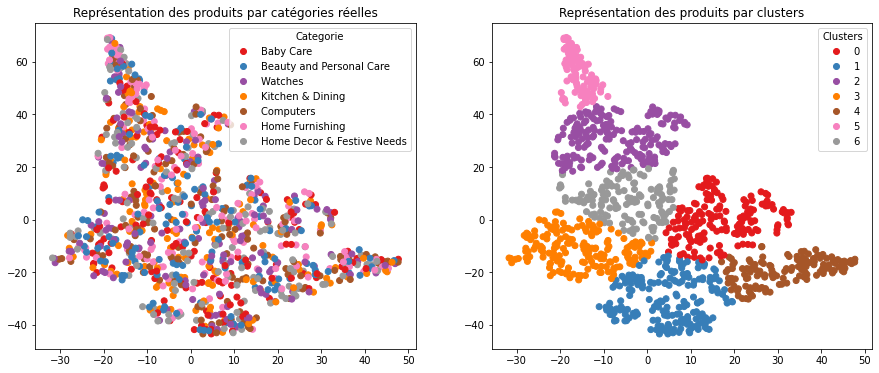

ARI :  0.001


In [87]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [88]:
#Orb ne semble pas être très bon pour classer des objets.

In [89]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.applications import VGG16

In [90]:
#définition des parametres d'entrée de l'image en couleurs
img_rows = 224
img_cols = 224
input_shape = (img_rows,img_cols,3)
vgg_model = VGG16(weights='imagenet', input_shape=input_shape, include_top=True)

# Make all layers untrainable
for layer in vgg_model.layers[:]:
  layer.trainable = False

553467096/553467096 [==============================] - 36s 0us/step


In [91]:
# Add fully connected layer which have 1024 neuron to VGG-16 model
output = vgg_model.get_layer('fc2').output # C4EST QUOI UN FULL CONNECTED LAYER 
output = Flatten(name='new_flatten')(output) # flatten réduire tout à plat
output = Dense(units=1024, activation='relu', name='new_fc')(output) # pourquoi fonction d'activation ? 
vgg_model = Model(vgg_model.input, output)

In [92]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [93]:
from os import listdir

In [94]:
%cd '/content/gdrive/MyDrive/openclassroom/'

/content/gdrive/MyDrive/openclassroom


In [116]:
os.getcwd()

'/content/gdrive/MyDrive/openclassroom/Images'

In [96]:
os.listdir(os.getcwd()+'/Images')

['f01140c02fd09e5c56312a64fa8db3da.jpg',
 'b4d35b6536b623c83b293eb3a1c02bba.jpg',
 '69446af66066146718cd569f87e99fff.jpg',
 '6329ddb46087cb8c09ced95471dd9643.jpg',
 'e2ae2af58ac50adf4881751ae84a9d8a.jpg',
 '7e6ae1b372e8e0b509b83ba3658b8107.jpg',
 '3c4604dba348a99a2dfbbc2cd3928101.jpg',
 '24e85c590481a7cedfe66597f253f2b2.jpg',
 '5e84d36ad6db970548498829db8b15de.jpg',
 '4a1b23dacd7d2a9ec7414f7159f25a48.jpg',
 '0abfcbe0e17dd50c4cf5fb1d6037d514.jpg',
 '66a5a21ea332aefcc7b90dbad94053aa.jpg',
 'f4e7f269319ba9cf5507a9e2febacbf5.jpg',
 '95330f6f0f44d17b918feec36bedcdef.jpg',
 '80e9cb3d2d7f9ff7bc497c34df366d03.jpg',
 '2baa415ebcc4fe563ce13b50e60efc1c.jpg',
 '903d63e2b71d692ccd628e1de516516e.jpg',
 '707b160df4c4dece6cde52b222ce624b.jpg',
 'ed9817e8960a6a0d509061c54cfe5ac1.jpg',
 '9ba898ecb77ab5a6799c8b047c6b6008.jpg',
 '5a7a1287fef0d986a5e237797beee286.jpg',
 'afc3ebd18df498dd87abb7ad7536b5c7.jpg',
 'f2658bad8c2b7d5b08984c6ac34267f7.jpg',
 '141d2b743c477043041faddf9233c8ad.jpg',
 '7a3f11f380a1bf

In [117]:
img_path = os.listdir(os.getcwd())

In [118]:
pictures_path = r'/content/gdrive/MyDrive/openclassroom/Images'
liste_image_name = listdir(pictures_path)

In [120]:
img_path = os.path.join(pictures_path, img_in_liste)


In [121]:
def getFeatureVector(model, img_path):
  img = cv.imread(img_path)
  img = cv.resize(img, (224, 224))
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # du format de pillow à celui accepté par KERAS

  feature_vector = model.predict(img.reshape(1, 224, 224, 3))
  return feature_vector

In [122]:
import cv2 as cv

In [123]:
%cd '/content/gdrive/MyDrive/openclassroom/Images'

/content/gdrive/MyDrive/openclassroom/Images


In [124]:
time0 = time.time()
features_vgg16 = np.zeros((1,1024))

for img_in_liste in liste_image_name:# récupérer chacune des images une par une 
    vector = getFeatureVector(vgg_model, img_path) # récupérer le vecteur des features
    features_vgg16 = np.concatenate((features_vgg16,vector), axis = 0) #ajouter les features de chaque vecteur
    print(features_vgg16.shape) #
features_vgg16 =np.delete(features_vgg16,0, axis=0) # suppression ligne de 0 du début
print(f'temps d\'exécution {np.round(time.time()-time0,0)}')

1/1 [==============================] - 6s 6s/step
(2, 1024)
1/1 [==============================] - 0s 16ms/step
(3, 1024)
1/1 [==============================] - 0s 22ms/step
(4, 1024)
1/1 [==============================] - 0s 14ms/step
(5, 1024)
1/1 [==============================] - 0s 16ms/step
(6, 1024)
1/1 [==============================] - 0s 16ms/step
(7, 1024)
1/1 [==============================] - 0s 17ms/step
(8, 1024)
1/1 [==============================] - 0s 15ms/step
(9, 1024)
1/1 [==============================] - 0s 17ms/step
(10, 1024)
1/1 [==============================] - 0s 15ms/step
(11, 1024)
1/1 [==============================] - 0s 16ms/step
(12, 1024)
1/1 [==============================] - 0s 17ms/step
(13, 1024)
1/1 [==============================] - 0s 18ms/step
(14, 1024)
1/1 [==============================] - 0s 15ms/step
(15, 1024)
1/1 [==============================] - 0s 20ms/step
(16, 1024)
1/1 [==============================] - 0s 15ms/step
(17, 1024)
1/

In [125]:
features_vgg16

array([[0.83438784, 0.0971455 , 0.        , ..., 0.        , 2.80450225,
        0.        ],
       [0.83438784, 0.0971455 , 0.        , ..., 0.        , 2.80450225,
        0.        ],
       [0.83438784, 0.0971455 , 0.        , ..., 0.        , 2.80450225,
        0.        ],
       ...,
       [0.83438784, 0.0971455 , 0.        , ..., 0.        , 2.80450225,
        0.        ],
       [0.83438784, 0.0971455 , 0.        , ..., 0.        , 2.80450225,
        0.        ],
       [0.83438784, 0.0971455 , 0.        , ..., 0.        , 2.80450225,
        0.        ]])

In [126]:
ARI, X_tsne, labels = ARI_fct(features_vgg16)

ARI :  -0.0006 time :  15.0


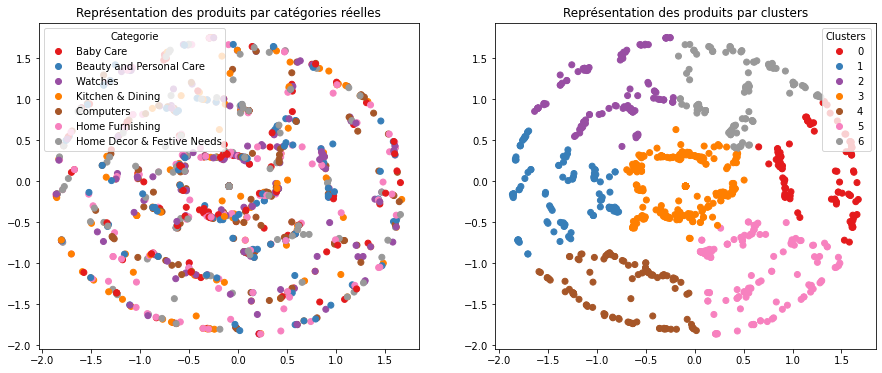

ARI :  -0.0006


In [127]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)